# Day 11: Chronal Charge
https://adventofcode.com/2018/day/11

In [1]:
import itertools
import numpy

def getPGValue(seed, x, y):
    rackId = x + 1 + 10
    level = ((rackId * (y + 1)) + seed) * rackId
    level = int((level / 100) % 10) - 5
    return level

def getLargestSquareSum(grid, size):
    largestSum = 0
    largestXY = (0, 0)
    for x, y in itertools.product(range(0, 301 - size), range(1, 302 - size)):
        square = grid[x:x + size, y:y + size]
        total = square.sum()
    
        if (total > largestSum):
            largestSum = total
            largestXY = (x, y)
    return largestXY, largestSum

powerGridSeed = 8868
powerGrid = numpy.array([[0] * 300 for i in range(300)])

# Build the grid
for x, y in itertools.product(range(300), range(300)):
    powerGrid[x, y] = getPGValue(powerGridSeed, x, y)

## Answer #1

In [2]:
answer1 = getLargestSquareSum(powerGrid, 3)
print("Answer #1: %d,%d" % (answer1[0][0] + 1, answer1[0][1] + 1))

Answer #1: 241,40


## Answer #2

In [3]:
# Answers for part 2 are kind of a bell curve - once the answer drops below 0,
# the maximum has already been found.
results = {}
for size in range(4, 100):
    results[size] = getLargestSquareSum(powerGrid, size) + (size,)
    if (results[size][1] <= 0):
        break

In [4]:
answer2 = max(results.values(), key = lambda x: x[1])
print("Answer #2: %d,%d,%d" % (answer2[0][0] + 1, answer2[0][1] + 1, answer2[2]))

Answer #2: 166,75,12


## Visualisation of the fuel cell grid

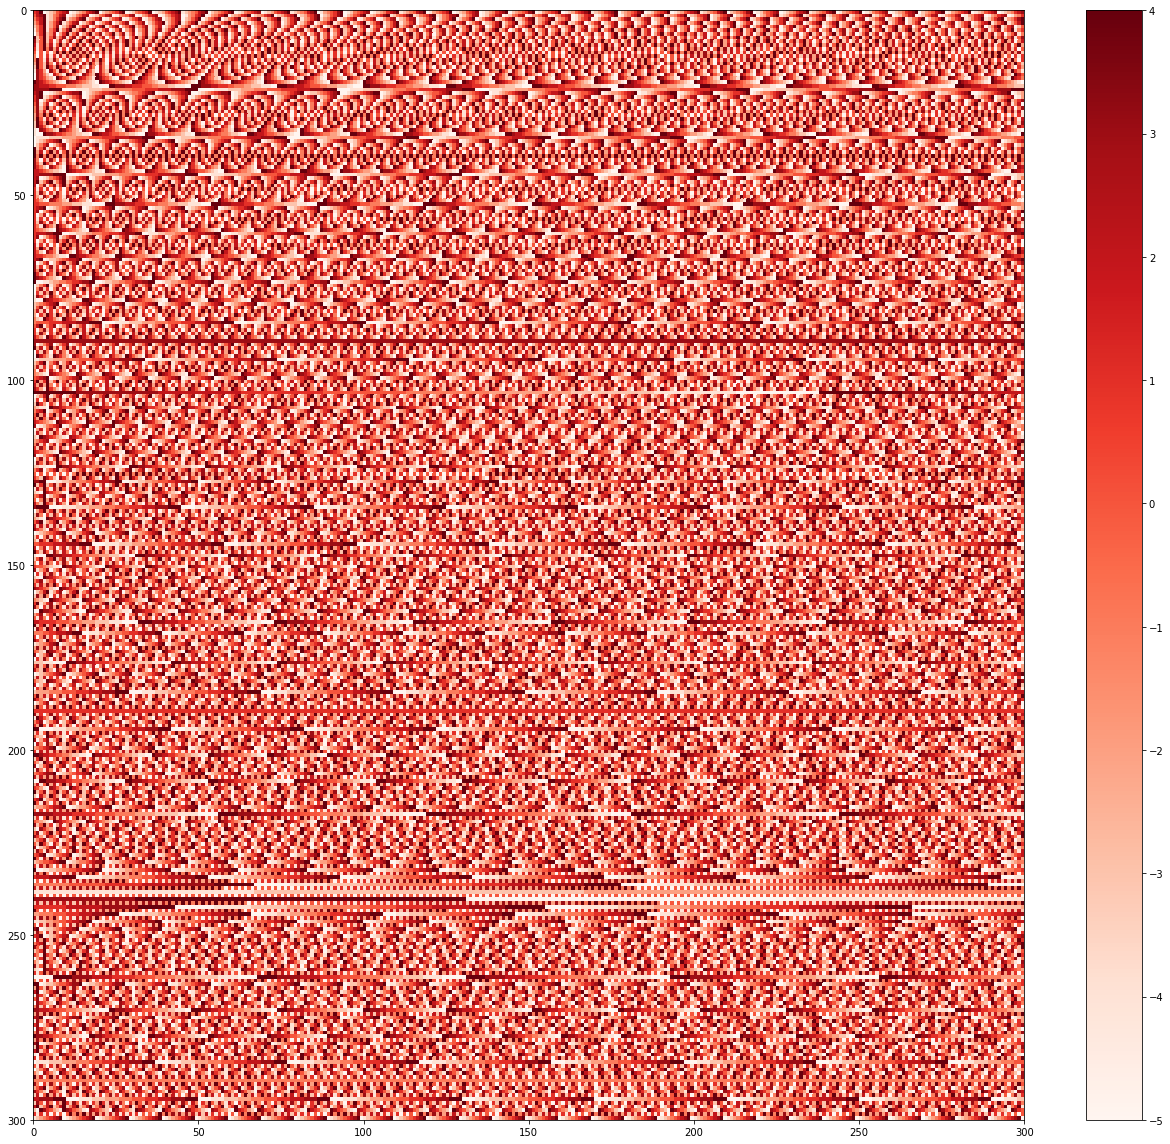

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (18, 16))
im = ax.pcolor(powerGrid, cmap = plt.cm.Reds)
fig.tight_layout()
plt.xlim(0, 300)
plt.ylim(300, 0)
plt.colorbar(im)
plt.show()